In [1]:
import json
import os
from PIL import Image
import numpy as np
import cv2

In [3]:
# 클래스 이름을 숫자 레이블로 매핑하기 위한 사전 정의
class_name_to_id = {
	"road": 1,
	"sidewalk": 2,
    "road roughness": 3,
	"road boundaries": 4,
	"crosswalks": 5,
	"lane": 6,
	"road color guide": 7,
	"road marking": 8,
	"parking": 9,
	"traffic sign": 10,
	"traffic light": 11,
	"pole/structural object": 12,
	"building": 13,
	"tunnel": 14,
	"bridge": 15,
	"pedestrian": 16,
	"vehicle": 17,
	"bicycle": 18,
	"motorcycle": 19,
	"personal mobility": 20,
	"dynamic": 21,
	"vegetation": 22,
	"sky": 23,
	"static": 0
}

In [4]:
def json_to_png(json_path, png_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    width, height = data["image_size"]
    segmentation_map = np.zeros((height, width), dtype=np.uint8)
    
    for annotation in data['Annotation']:
        class_name = annotation['class_name']
        class_id = class_name_to_id.get(class_name, 0)  # 매핑되지 않은 클래스는 static으로 설정
        for segment in annotation['data']:
            if isinstance(segment, list):  # polygon 형태인지 확인
                poly = np.array(segment).reshape((len(segment) // 2, 2))
                poly = poly.astype(np.int32)
                cv2.fillPoly(segmentation_map, [poly], class_id)
    
    Image.fromarray(segmentation_map).save(png_path)
    return segmentation_map

Test로 1개만 변환

In [5]:
json_file = '/mnt/datasets/2DSS/2DSS/training/labels/E_DCG_230829_141_FC_008.json'

if json_file.endswith('.json'):
	png_file = json_file.replace('.json', '.png')
	segmentation_map = json_to_png(json_file, png_file)

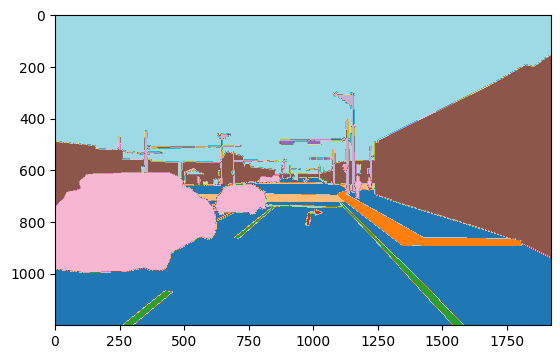

In [6]:
import matplotlib.pyplot as plt
plt.imshow(segmentation_map, cmap='tab20')

전체 파일에 적용

In [5]:
# Train label
json_dir = '/mnt/datasets/2DSS/2DSS/training/labels'
png_dir = '/mnt/datasets/2DSS/Preprocessed3/annotations/train'

os.makedirs(png_dir, exist_ok=True)

for json_file in os.listdir(json_dir):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_dir, json_file)
        png_path = os.path.join(png_dir, json_file.replace('.json', '.png'))
        segmentation_map = json_to_png(json_path, png_path)
        
        # PNG 파일 시각화
        # plt.imshow(segmentation_map, cmap='tab20')
        # plt.colorbar()
        # plt.title(json_file)
        # plt.show()

In [6]:
# Validation label
json_dir = '/mnt/datasets/2DSS/2DSS/validation/labels'
png_dir = '/mnt/datasets/2DSS/Preprocessed3/annotations/val'

os.makedirs(png_dir, exist_ok=True)

for json_file in os.listdir(json_dir):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_dir, json_file)
        png_path = os.path.join(png_dir, json_file.replace('.json', '.png'))
        segmentation_map = json_to_png(json_path, png_path)
        
        # PNG 파일 시각화
        # plt.imshow(segmentation_map, cmap='tab20')
        # plt.colorbar()
        # plt.title(json_file)
        # plt.show()

In [7]:
# Test label
json_dir = '/mnt/datasets/2DSS/2DSS/test/labels'
png_dir = '/mnt/datasets/2DSS/Preprocessed3/annotations/test'

os.makedirs(png_dir, exist_ok=True)

for json_file in os.listdir(json_dir):
    if json_file.endswith('.json'):
        json_path = os.path.join(json_dir, json_file)
        png_path = os.path.join(png_dir, json_file.replace('.json', '.png'))
        segmentation_map = json_to_png(json_path, png_path)
        
        # PNG 파일 시각화
        # plt.imshow(segmentation_map, cmap='tab20')
        # plt.colorbar()
        # plt.title(json_file)
        # plt.show()